In [4]:
import osmnx as ox
import pandas as pd
from pandas import DataFrame
import pandana, matplotlib.pyplot as plt
%matplotlib inline
from pandana.loaders import osm

point = (38.3459813, -0.49069405)
dist = 1500
networkType = 'walk'

#####Get north, south, east, west 
bbox = ox.bbox_from_point(point, distance=dist)
north, south, east, west = bbox
north, south, east, west

#####Create network graph 1, "G", with osmnx
bbox = [north, south, east, west]
G1 = ox.graph_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3], network_type= networkType)

#####Retrieve NODES using Pandana : lat_min(south = bbox[1]), lng_min (west = bbox[3]), lat_max (north = bbox[0]), lng_max (east = bbox[2])
G2 = osm.pdna_network_from_bbox(bbox[1], bbox[3], bbox[0], bbox[2])

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](38.33247573,-0.50784347,38.35948684,-0.47354495);>;);out;'}"
Downloaded 1,724.6KB from www.overpass-api.de in 3.83 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 3.87 seconds
Returning OSM data with 10,495 nodes and 2,693 ways...
Edge node pairs completed. Took 9.00 seconds
Returning processed graph with 4,014 nodes and 6,419 edges...
Completed OSM data download and Pandana node and edge table creation in 13.19 seconds


In [5]:
tag_highway = ['bus_stop']
tag_amenity = ['bicycle_parking', 'motorcycle_parking', 'parking']
tags = tag_highway + tag_amenity
#print(tags)

tag_list = []
for i in range (0, len(tag_highway)):
    tag_list.append('"highway"="%s"'%tag_highway[i])
    for j in range (0, len(tag_amenity)):
        tag_list.append('"amenity"= "%s"'%tag_amenity[j])
 
pois2_lon = []
pois2_lat = []
for i in range (0,len(tag_list)):
    names = locals()
    names['pois2_{}'.format(tags[i])] = osm.node_query(bbox[1], bbox[3], bbox[0], bbox[2], tags='{}'.format(tag_list[i])) #each tag has own var name and data set
    names['pois2_{}_lon'.format(tags[i])] = list(names['pois2_{}'.format(tags[i])]['lon']) #each tag has own var name and lon list
    names['pois2_{}_lat'.format(tags[i])] = list(names['pois2_{}'.format(tags[i])]['lat']) #each tag has own var name and lat list

for i in range (0, len(tags)):
    pois2_lon += names['pois2_{}_lon'.format(tags[i])]  #all lon
    pois2_lat += names['pois2_{}_lat'.format(tags[i])]  #all lat

#put all the pois2 data together
pois2 = names['pois2_{}'.format(tags[0])]

for i in range(0,len(tags)):
        if i > 0 :
               pois2 = pois2.append(names['pois2_{}'.format(tags[i])]) 

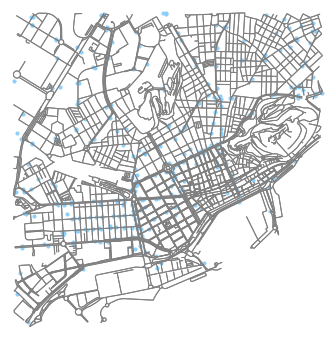

In [8]:
fig, ax = ox.plot_graph(G1, fig_height=6, 
                        node_color='grey', node_size=20, node_zorder=2,  
                         node_alpha=0,                    
                        show=False, close=False,   
                        edge_color = 'grey')

x_pois = list(pois2['lon'])
y_pois = list(pois2['lat'])
ax.scatter(x_pois, y_pois, c = 'lightskyblue', s = 10, alpha=0.9)

plt.show()